In [1]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


# Prelim

In [3]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/interim_samples_511_plus.npz"

In [4]:
ds = load_dataset(fpath)

In [6]:
ds.keys()

dict_keys(['samples', 'truth', 'hyper'])

In [7]:
ds['samples'].keys()

dict_keys(['e2', 'e1'])

In [8]:
ds['samples']['e1'].shape

(320000, 300)

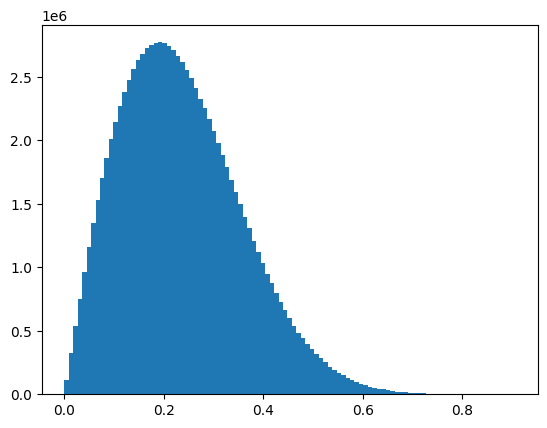

In [9]:
e_mag = np.sqrt(ds['samples']['e1'].ravel()**2 + ds['samples']['e2'].ravel()**2 )
plt.hist(e_mag, bins=101);

In [10]:
ds['truth']['lf'].shape

(320000,)

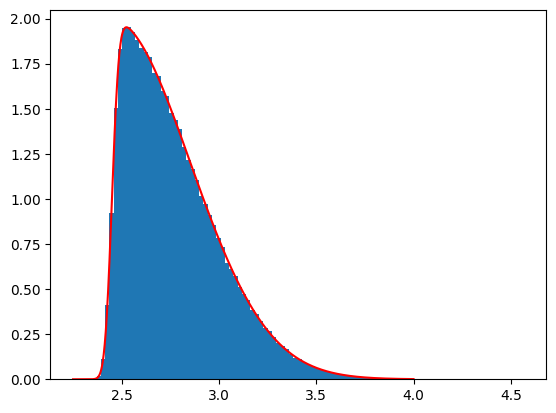

In [11]:

from scipy.stats import lognorm, skewnorm, norm

_ = plt.hist(ds['truth']['lf'], bins=101, density=True)

x = np.linspace(2.25, 4.0, 1000)
y = skewnorm.pdf(x, a=14, loc=2.45, scale=0.4)

plt.plot(x, y, 'r-')

np.float64(-0.11847949040846958)

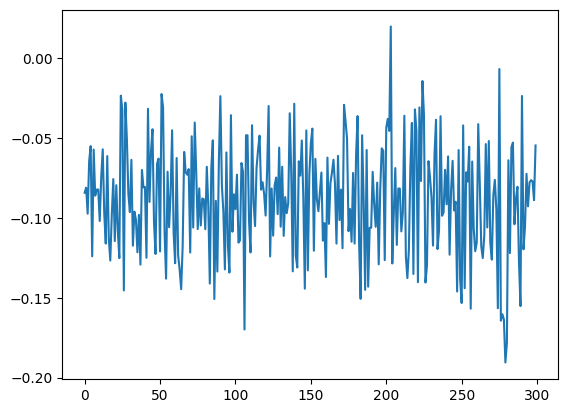

In [14]:
plt.plot(ds['samples']['e1'][1005, :])
ds['truth']['e1'][1005]

np.float64(0.1029222090044249)

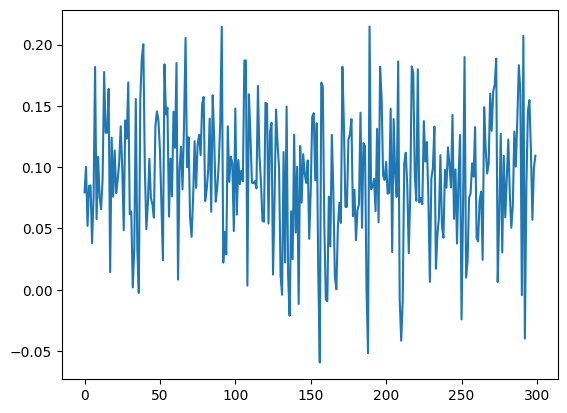

In [16]:
plt.plot(ds['samples']['e2'][500, :])
ds['truth']['e2'][500]

# Shear

In [17]:
fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_512_plus.npy"
fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_512_minus.npy"

In [18]:
gp = np.load(fpath1)
gm = np.load(fpath2)

In [19]:
gp.shape

(3000, 2)

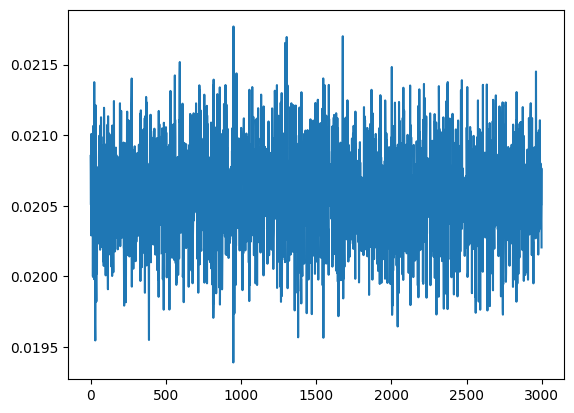

In [20]:
plt.plot(gp[:, 0])

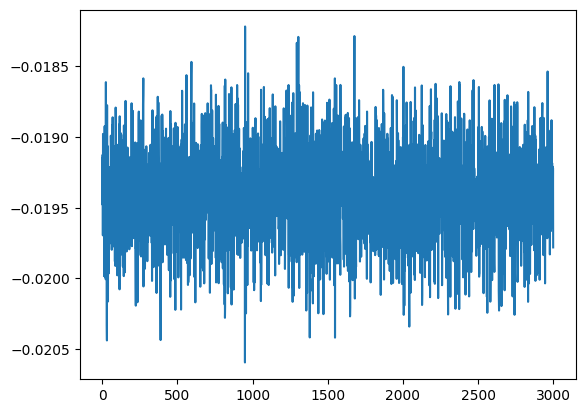

In [21]:
plt.plot(gm[:, 0])

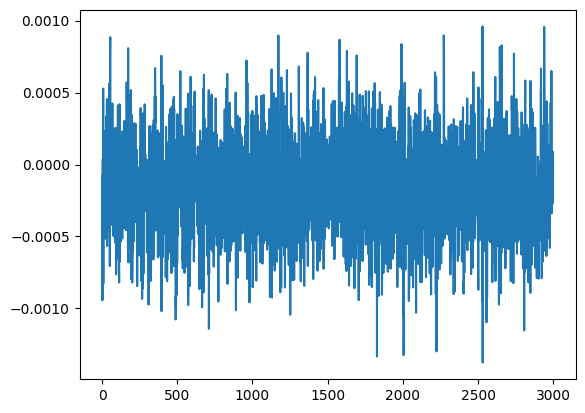

In [22]:
plt.plot(gp[:, 1])

In [23]:
gp[:, 0].mean(), gp[:, 0].std()

(np.float64(0.020581086706269302), np.float64(0.00033299111468832685))

In [24]:
m = (gp[:, 0].mean() - gm[:, 0].mean()) / 2/ 0.02 - 1
m/1e-3

np.float64(-0.3609232147949726)

# Alternative method of estimating error

In [25]:
from bpd.io import load_dataset
import numpy as np

In [26]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_514_errs.npz"

In [27]:
ds = load_dataset(fpath)

In [28]:
ds.keys()

dict_keys(['g_plus', 'g_minus', 'sigma_e', 'sigma_e_int'])

In [29]:
gp = ds['g_plus']
gm = ds['g_minus']

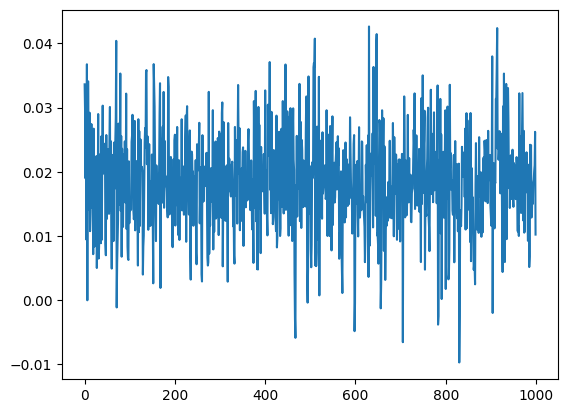

In [30]:
plt.plot(gp[2, :, 0])

In [31]:
gp.shape

(500, 1000, 2)

In [32]:
m = (gp[:, :, 0].mean(axis=1) - gm[:, :, 0].mean(axis=1)) / 2 / 0.02 -1

In [33]:
m.std() / np.sqrt(500) / 1e-3 

np.float64(0.2526046714805732)

In [34]:
m.mean() / 1e-3 

np.float64(-0.3804633645918556)

In [35]:
c = (gp[:, :, 1].mean(axis=1) + gm[:, :, 1].mean(axis=1)) / 2

In [36]:
c.std() / np.sqrt(500) / 1e-3

np.float64(0.33329685894487404)

In [37]:
c.mean()

np.float64(-0.00016888450600846089)

(array([  3.,  19.,  44., 102., 132.,  96.,  63.,  28.,  12.,   1.]),
 array([-0.02229047, -0.0175837 , -0.01287694, -0.00817017, -0.0034634 ,
         0.00124337,  0.00595014,  0.0106569 ,  0.01536367,  0.02007044,
         0.02477721]),
 <BarContainer object of 10 artists>)

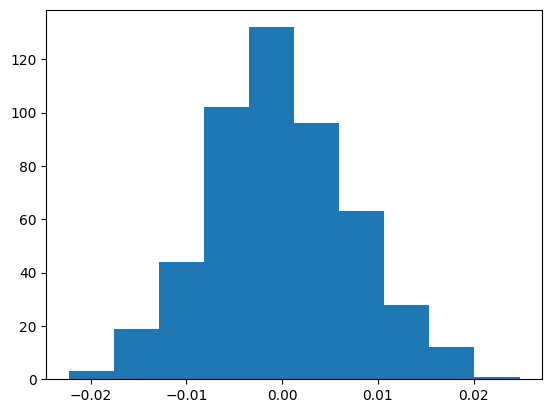

In [38]:
plt.hist(c)

# Verify bootstrap and subsets on smaller subset of galaxies have consistent errors

In [18]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [19]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_boots_111.npz"

In [20]:
ds = load_dataset(fpath)

In [22]:
gpb = ds['gp']
gmb = ds['gm']
gpb.shape

(200, 1000, 2)

In [23]:
mb = (gpb[:, :, 0].mean(1) - gmb[:, :, 0].mean(1)) / 2/ 0.02 - 1
mb.std()

np.float64(0.0015167318222347233)

(array([ 3., 10., 15., 29., 48., 46., 26., 19.,  3.,  1.]),
 array([-0.0067951 , -0.00590578, -0.00501646, -0.00412714, -0.00323782,
        -0.0023485 , -0.00145917, -0.00056985,  0.00031947,  0.00120879,
         0.00209811]),
 <BarContainer object of 10 artists>)

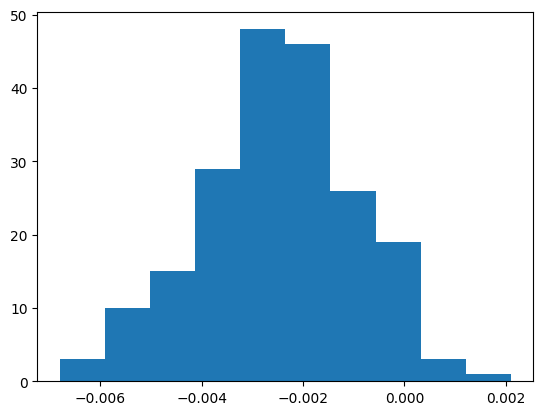

In [24]:
plt.hist(mb)

In [26]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_111_errs.npz"
ds = load_dataset(fpath)

In [28]:
ds.keys()

dict_keys(['g_plus', 'g_minus', 'sigma_e', 'sigma_e_int'])

In [29]:
gps = ds['g_plus']
gms = ds['g_minus']
gps.shape

(500, 1000, 2)

In [30]:
ms = (gps[:, :, 0].mean(1)  - gms[:, :, 0].mean(1) ) / 2/ 0.02 -1 
ms.shape

(500,)

In [32]:
ms.std() / np.sqrt(ms.shape[0])

np.float64(0.0015050260476905464)